## Feature Engineering and CV based Winners' Solutions

continued from eda_4_26

New in this notebook:
- Trained@2015-06-28, validated@2015-12-28, MAP@7=0.858, private LB=0.0302798, public LB=0.0298547

In [1]:
from santander_helper import *

Train, validate, and predict, repetition 0 of 5
[0]	train-mlogloss:2.68481	val-mlogloss:2.71827	train-MAP@7:0.875411	val-MAP@7:0.829937
[1]	train-mlogloss:2.49801	val-mlogloss:2.54541	train-MAP@7:0.880893	val-MAP@7:0.840666
[2]	train-mlogloss:2.35121	val-mlogloss:2.41144	train-MAP@7:0.882613	val-MAP@7:0.843352
[3]	train-mlogloss:2.23021	val-mlogloss:2.30366	train-MAP@7:0.8845	val-MAP@7:0.846407
[4]	train-mlogloss:2.12669	val-mlogloss:2.20749	train-MAP@7:0.88538	val-MAP@7:0.847991
[5]	train-mlogloss:2.03629	val-mlogloss:2.12654	train-MAP@7:0.886223	val-MAP@7:0.848704
[6]	train-mlogloss:1.95572	val-mlogloss:2.05314	train-MAP@7:0.887302	val-MAP@7:0.850942
[7]	train-mlogloss:1.88405	val-mlogloss:1.98616	train-MAP@7:0.888084	val-MAP@7:0.851748
[8]	train-mlogloss:1.81912	val-mlogloss:1.92836	train-MAP@7:0.888608	val-MAP@7:0.851952
[9]	train-mlogloss:1.76003	val-mlogloss:1.8745	train-MAP@7:0.888922	val-MAP@7:0.851964
[10]	train-mlogloss:1.706	val-mlogloss:1.82563	train-MAP@7:0.889262	val-MAP@

[92]	train-mlogloss:0.773282	val-mlogloss:1.0064	train-MAP@7:0.90483	val-MAP@7:0.860506
[93]	train-mlogloss:0.7715	val-mlogloss:1.00542	train-MAP@7:0.905105	val-MAP@7:0.860533
[94]	train-mlogloss:0.769667	val-mlogloss:1.00455	train-MAP@7:0.905166	val-MAP@7:0.860517
[95]	train-mlogloss:0.76788	val-mlogloss:1.00325	train-MAP@7:0.905349	val-MAP@7:0.860649
[96]	train-mlogloss:0.766292	val-mlogloss:1.00211	train-MAP@7:0.905438	val-MAP@7:0.860629
[97]	train-mlogloss:0.764686	val-mlogloss:1.00098	train-MAP@7:0.905574	val-MAP@7:0.860584
[98]	train-mlogloss:0.763039	val-mlogloss:0.99986	train-MAP@7:0.905654	val-MAP@7:0.86063
[99]	train-mlogloss:0.76154	val-mlogloss:0.998861	train-MAP@7:0.905823	val-MAP@7:0.860649
Validate logloss = 0.99886, MAP@7 = 0.86065, time = 12.95 min
--------------------------------------------------

Train, validate, and predict, repetition 1 of 5
[0]	train-mlogloss:2.68372	val-mlogloss:2.70955	train-MAP@7:0.879326	val-MAP@7:0.832385
[1]	train-mlogloss:2.49808	val-mlogl

[83]	train-mlogloss:0.791365	val-mlogloss:1.022	train-MAP@7:0.903859	val-MAP@7:0.860102
[84]	train-mlogloss:0.789131	val-mlogloss:1.02032	train-MAP@7:0.903917	val-MAP@7:0.859984
[85]	train-mlogloss:0.786971	val-mlogloss:1.01869	train-MAP@7:0.90408	val-MAP@7:0.860054
[86]	train-mlogloss:0.784872	val-mlogloss:1.01723	train-MAP@7:0.904164	val-MAP@7:0.859975
[87]	train-mlogloss:0.782815	val-mlogloss:1.01576	train-MAP@7:0.904398	val-MAP@7:0.860005
[88]	train-mlogloss:0.780827	val-mlogloss:1.01466	train-MAP@7:0.904475	val-MAP@7:0.860159
[89]	train-mlogloss:0.778917	val-mlogloss:1.01328	train-MAP@7:0.904593	val-MAP@7:0.860253
[90]	train-mlogloss:0.776872	val-mlogloss:1.01179	train-MAP@7:0.904796	val-MAP@7:0.860432
[91]	train-mlogloss:0.775054	val-mlogloss:1.01028	train-MAP@7:0.904965	val-MAP@7:0.860386
[92]	train-mlogloss:0.77331	val-mlogloss:1.00924	train-MAP@7:0.905058	val-MAP@7:0.860366
[93]	train-mlogloss:0.771541	val-mlogloss:1.00802	train-MAP@7:0.905157	val-MAP@7:0.860554
[94]	train-mlo

[74]	train-mlogloss:0.814926	val-mlogloss:1.0396	train-MAP@7:0.902935	val-MAP@7:0.859519
[75]	train-mlogloss:0.812023	val-mlogloss:1.03754	train-MAP@7:0.903093	val-MAP@7:0.859685
[76]	train-mlogloss:0.809215	val-mlogloss:1.03517	train-MAP@7:0.903098	val-MAP@7:0.859701
[77]	train-mlogloss:0.806525	val-mlogloss:1.03302	train-MAP@7:0.903223	val-MAP@7:0.859766
[78]	train-mlogloss:0.80385	val-mlogloss:1.03085	train-MAP@7:0.903321	val-MAP@7:0.85988
[79]	train-mlogloss:0.801195	val-mlogloss:1.02913	train-MAP@7:0.903458	val-MAP@7:0.859784
[80]	train-mlogloss:0.798791	val-mlogloss:1.02733	train-MAP@7:0.903612	val-MAP@7:0.859794
[81]	train-mlogloss:0.796279	val-mlogloss:1.02555	train-MAP@7:0.90379	val-MAP@7:0.859756
[82]	train-mlogloss:0.794034	val-mlogloss:1.02401	train-MAP@7:0.903896	val-MAP@7:0.859951
[83]	train-mlogloss:0.79167	val-mlogloss:1.02209	train-MAP@7:0.904052	val-MAP@7:0.859903
[84]	train-mlogloss:0.789489	val-mlogloss:1.02032	train-MAP@7:0.904219	val-MAP@7:0.859947
[85]	train-mlog

[65]	train-mlogloss:0.845346	val-mlogloss:1.05816	train-MAP@7:0.901198	val-MAP@7:0.860043
[66]	train-mlogloss:0.84155	val-mlogloss:1.05493	train-MAP@7:0.901283	val-MAP@7:0.860021
[67]	train-mlogloss:0.837927	val-mlogloss:1.05188	train-MAP@7:0.901461	val-MAP@7:0.860111
[68]	train-mlogloss:0.834306	val-mlogloss:1.04899	train-MAP@7:0.901607	val-MAP@7:0.860167
[69]	train-mlogloss:0.830863	val-mlogloss:1.04613	train-MAP@7:0.901744	val-MAP@7:0.86009
[70]	train-mlogloss:0.827518	val-mlogloss:1.04352	train-MAP@7:0.901859	val-MAP@7:0.860356
[71]	train-mlogloss:0.824226	val-mlogloss:1.04095	train-MAP@7:0.901949	val-MAP@7:0.860333
[72]	train-mlogloss:0.821156	val-mlogloss:1.0382	train-MAP@7:0.902183	val-MAP@7:0.860372
[73]	train-mlogloss:0.818113	val-mlogloss:1.03586	train-MAP@7:0.902325	val-MAP@7:0.860472
[74]	train-mlogloss:0.815209	val-mlogloss:1.03382	train-MAP@7:0.902441	val-MAP@7:0.86058
[75]	train-mlogloss:0.812402	val-mlogloss:1.0315	train-MAP@7:0.902658	val-MAP@7:0.860571
[76]	train-mlog

[56]	train-mlogloss:0.885424	val-mlogloss:1.09888	train-MAP@7:0.89991	val-MAP@7:0.8574
[57]	train-mlogloss:0.880335	val-mlogloss:1.09468	train-MAP@7:0.900036	val-MAP@7:0.857335
[58]	train-mlogloss:0.875342	val-mlogloss:1.09021	train-MAP@7:0.900145	val-MAP@7:0.857511
[59]	train-mlogloss:0.870575	val-mlogloss:1.08604	train-MAP@7:0.900399	val-MAP@7:0.857636
[60]	train-mlogloss:0.865847	val-mlogloss:1.08215	train-MAP@7:0.900465	val-MAP@7:0.857788
[61]	train-mlogloss:0.861298	val-mlogloss:1.07821	train-MAP@7:0.900803	val-MAP@7:0.858078
[62]	train-mlogloss:0.857001	val-mlogloss:1.07432	train-MAP@7:0.900958	val-MAP@7:0.858251
[63]	train-mlogloss:0.85276	val-mlogloss:1.07065	train-MAP@7:0.901105	val-MAP@7:0.858365
[64]	train-mlogloss:0.848566	val-mlogloss:1.06711	train-MAP@7:0.901322	val-MAP@7:0.858447
[65]	train-mlogloss:0.844817	val-mlogloss:1.06354	train-MAP@7:0.90145	val-MAP@7:0.858661
[66]	train-mlogloss:0.841073	val-mlogloss:1.0604	train-MAP@7:0.901531	val-MAP@7:0.858728
[67]	train-mlogl

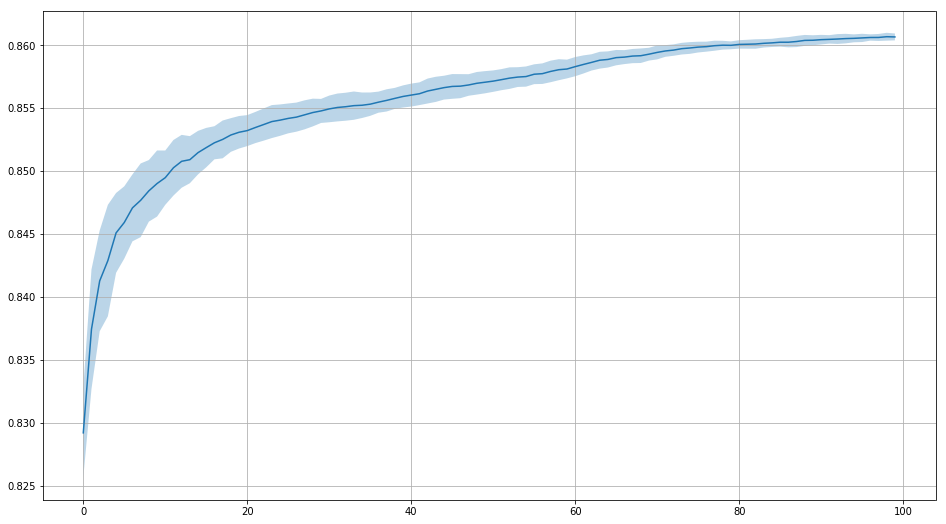

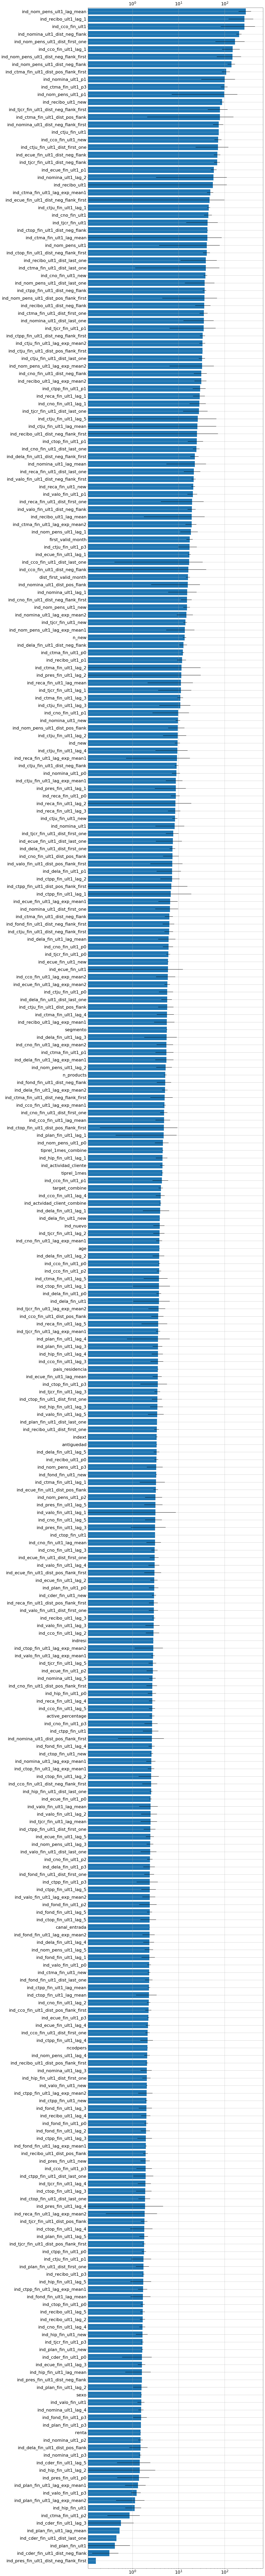

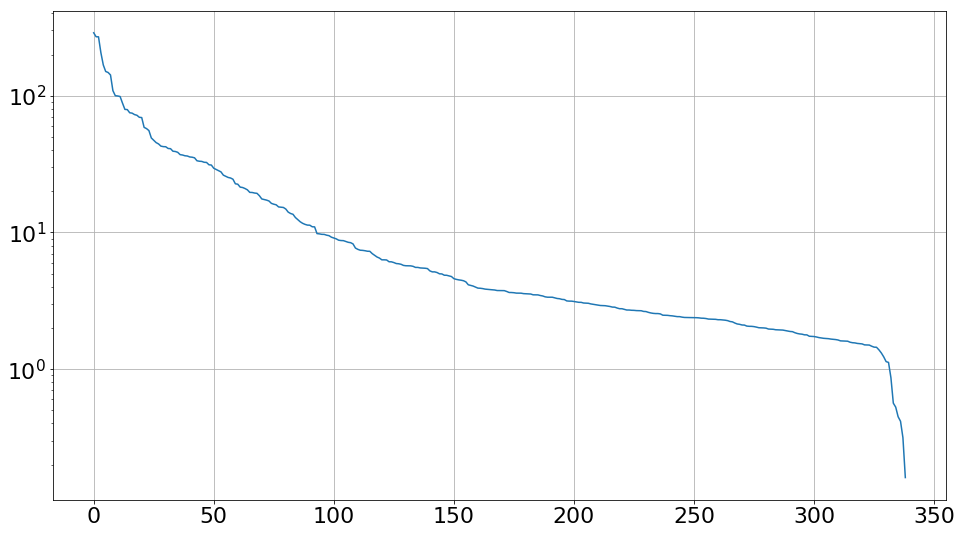

In [2]:
# Train, validation, and prediction
simulation_name = 'p2'
param = {'objective': 'multi:softprob', 
         'eta': 0.05, 
         'max_depth': 8,
         'silent': 1, 
         'num_class': len(target_cols),
         'eval_metric': 'mlogloss',
         'min_child_weight': 10,
         'subsample': 0.7,
         'colsample_bytree': 0.7,
         'seed': 0}
num_rounds = 100
n_repeat = 5

history, model_dict, y_pred, y_sub = \
    train_test_month(param, num_rounds, '2015-06-28', '2016-05-28', 
    'eda_4_32_{}.csv.gz'.format(simulation_name), n_repeat=n_repeat, random_seed=54, n_features=350)

# History and learning curve
history_train = history.xs(axis=1, level=[1, 2], key=['train', 'MAP@7']).copy()
history_train['mean'] = history_train.iloc[:, :n_repeat].mean(axis=1)
history_train['std'] = history_train.iloc[:, :n_repeat].std(axis=1)

history_val = history.xs(axis=1, level=[1, 2], key=['val', 'MAP@7']).copy()
history_val['mean'] = history_val.iloc[:, :n_repeat].mean(axis=1)
history_val['std'] = history_val.iloc[:, :n_repeat].std(axis=1)

plt.figure(figsize=(16, 9))
# plt.plot(history_train['mean'])
# plt.fill_between(history_train.index, history_train['mean']+history_train['std'], history_train['mean']-history_train['std'], alpha=0.3)

plt.plot(history_val['mean'])
plt.fill_between(history_val.index, history_val['mean']+history_val['std'], history_val['mean']-history_val['std'], alpha=0.3)

plt.grid()

# Feature importance
fi = pd.DataFrame({i: model_dict[i].get_score(importance_type='gain') for i in range(n_repeat)})
fi['mean'] = fi.iloc[:, :n_repeat].mean(axis=1)
fi['std'] = fi.iloc[:, :n_repeat].std(axis=1)
fi.sort_values(by=['mean'], inplace=True, ascending=False)
# fi.reset_index(inplace=True)
#fi.to_csv('feature_importance_{}.csv'.format(simulation_name))

plt.rcParams.update({'figure.figsize': '16, 240'})
plt.rcParams.update({'font.size': '22'})
fig, ax = plt.subplots()
ax.barh(fi.index, fi['mean'].values, log=True, xerr=fi['std'].values)
ax.grid()
ax.tick_params(labelbottom=True,labeltop=True)
ax.set_ylim(fi.shape[0], -0.5)

plt.figure(figsize=(16, 9))
plt.plot(fi.values[:, n_repeat])
plt.grid()
plt.yscale('log')

# Save data
save_pickle('parameter_tune_eda_4_32_{}.pickle'.format(simulation_name), (history, model_dict, y_pred, y_sub, fi, param))

In [4]:
history_val

repetition,0,1,2,3,4,mean,std
0,0.829937,0.832385,0.826749,0.832501,0.824406,0.829196,0.003556
1,0.840666,0.838665,0.832449,0.842858,0.832534,0.837434,0.004750
2,0.843352,0.842990,0.837910,0.845825,0.836289,0.841273,0.004004
3,0.846407,0.842360,0.840159,0.848167,0.837362,0.842891,0.004430
4,0.847991,0.843498,0.844286,0.848617,0.841059,0.845090,0.003174
5,0.848704,0.843190,0.845536,0.849052,0.843111,0.845919,0.002874
6,0.850942,0.845220,0.846995,0.848140,0.844113,0.847082,0.002660
7,0.851748,0.845613,0.846616,0.849662,0.844778,0.847683,0.002928
8,0.851952,0.846981,0.846989,0.850024,0.846230,0.848435,0.002448
9,0.851964,0.846215,0.847364,0.851667,0.847869,0.849016,0.002627
